In [2]:
import matplotlib.pyplot as plt

In [3]:
from collections import namedtuple

GeneStats = namedtuple('GeneStats', ['gene_id', 'mode'])

In [15]:
from math import exp


def visualize_gene_data(stats_file, dist_file, max_genes=5):
    gene_id_to_stats = {}
    with open(stats_file, 'r') as file:
        header = file.readline()
        for line in file:
            line = line.strip()
            parts = line.split('\t')
            gene_id = parts[0]
            gene_id_to_stats[gene_id] = GeneStats(gene_id, float(parts[3]))

            if max_genes is not None and len(gene_id_to_stats) >= max_genes:
                break

    # Create subplots
    num_plots = len(gene_id_to_stats)
    fig, axs = plt.subplots(num_plots, 1, figsize=(7, num_plots * 3))

    i = 0
    with open(dist_file, 'r') as file:
        for line in file:
            line = line.strip()

            # Split the line into parts
            parts = line.split('\t')

            # Extract the gene ID
            gene_id = parts[0]

            if gene_id not in gene_id_to_stats:
                continue
            stats = gene_id_to_stats[gene_id]
                
            # Extract Xs and Ys
            xs = parts[1::2]  # Take every second element starting from the first
            ys = parts[2::2]  # Take every second element starting from the second

            # Converting strings to floats for Xs and Ys if needed
            x_values = [float(x) for x in xs]
            y_values = [float(y) for y in ys]
            
            # Scatter plot of X vs Y values
            ax = axs[i] if num_plots > 1 else axs
            i += 1
            ax.scatter(x_values, y_values, color='red', s=1.5)
            ax.set_title(f'Posterior for {gene_id}')
            ax.set_xlabel('Binomial P')
            ax.set_ylabel('Density')

            ax.axvline(x=stats.mode, color='blue', linestyle='solid', linewidth=2, label=f"Mode: {stats.mode:.3f}")
            #ax.axvline(x=stats.mean, color='green', linestyle='solid', linewidth=2, label=f"Mean: {stats.mean:.3f}")
            ax.legend()

    fig.tight_layout()
    fig.show()

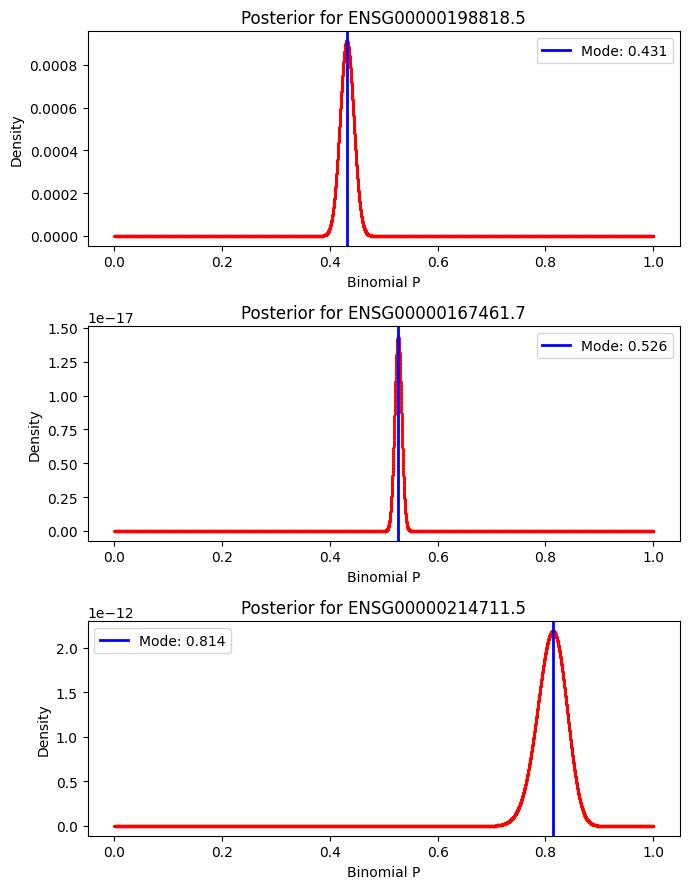

In [20]:
visualize_gene_data('/home/scarlett/github/BEASTIE/QuickBEAST/out', '/home/scarlett/github/BEASTIE/QuickBEAST/out.dist', max_genes=20)


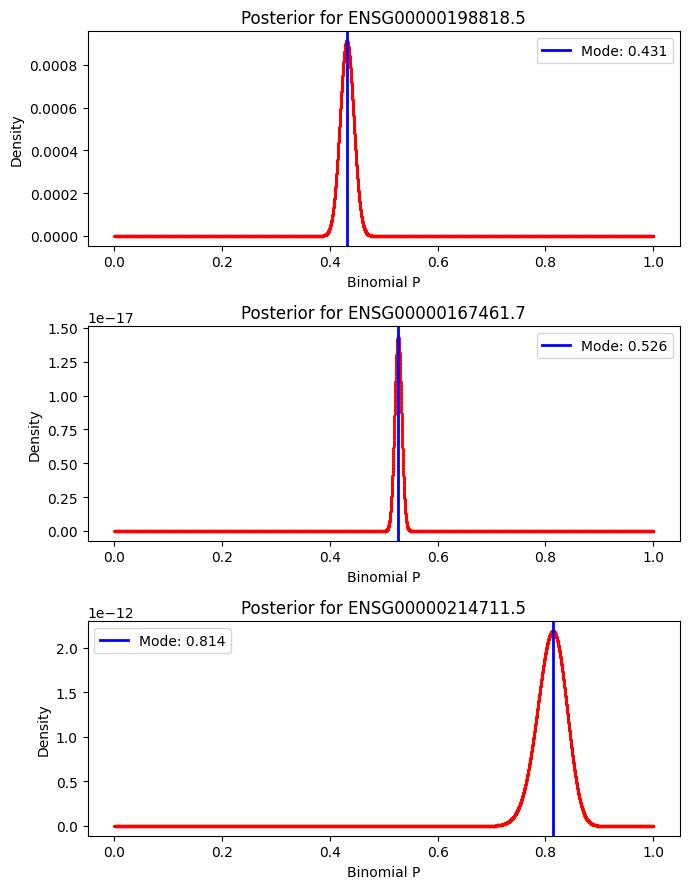

In [18]:
visualize_gene_data('/home/scarlett/github/BEASTIE/QuickBEAST/out', '/home/scarlett/github/BEASTIE/QuickBEAST/out.dist', max_genes=20)

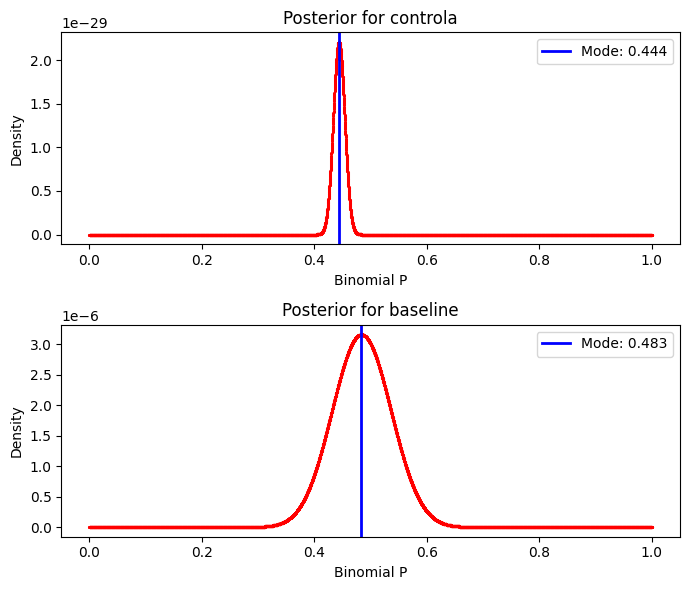

In [16]:
visualize_gene_data('out', 'out.dist', max_genes=20)

In [ ]:
visualize_gene_data('out_right', 'out_right.dist', max_genes=20)

In [ ]:
visualize_gene_data('out_fix1', 'out_fix1.dist', max_genes=20)

In [ ]:
import pandas as pd
def read_file_df(file_name):
    return pd.read_csv(file_name, sep='\t', header=0, dtype={'mean': float, 'mode': float}).set_index('gene')

def diff_files(file_a, file_b, file_out):
    a_df = read_file_df(file_a)
    b_df = read_file_df(file_b)

    if 'mode' in a_df.columns:
        a_df['mode'] = a_df['mode'].sub(0.5).abs()
        b_df['mode'] = b_df['mode'].sub(0.5).abs()
    if 'mean' in a_df.columns:
        a_df['mean'] = a_df['mean'].sub(0.5).abs()
        b_df['mean'] = b_df['mean'].sub(0.5).abs()

    d_df = (b_df - a_df).abs()

    print("MEAN:")
    print(d_df['mean'].describe())
    print("\nMODE:")
    print(d_df['mode'].describe())
    print("\n")

    if 'mode' in d_df.columns:
        max_diff = d_df['mode'].abs().max()
        print(f'Max mode diff: {max_diff:.8f}')
    if 'mean' in d_df.columns:
        max_diff = d_df['mean'].abs().max()
        print(f'Max mean diff: {max_diff:.8f}')

    d_df.to_csv(file_out, sep='\t', index=True)

def compare_mode_mean(file):
    df = read_file_df(file)

    # remove genes with mean = 0 or nan
    df = df[df['mean'] > 0]

    df['diff'] = (df['mode'].sub(0.5).abs() - df['mean'].sub(0.5).abs()).abs()

    print(df['diff'].describe())

    df = df.sort_values(by=['diff'], ascending=False)
    print(df)


In [ ]:
compare_mode_mean('out_fixed')

In [ ]:
diff_files('out_na12878_unfixed', 'out_na12878_fixed', 'out.diff')